## GitHub example Elastic and Transformix

In [2]:
# Library imports
import matplotlib.pyplot as plt
import imageio.v3 as iio
import elastix
import os

# General file paths
BASE_PATH_MR = "ImagesforPractical/MR"
path = r'C:/Users/20212238/OneDrive - TU Eindhoven/Documents/TUE/M - Jaar 1/Capita Selecta in MI/'
ELASTIX_PATH = os.path.join(path,'elastix-5.0.0-win64/elastix.exe')
TRANSFORMIX_PATH = os.path.join(path,'elastix-5.0.0-win64/transformix.exe')

if not os.path.exists(ELASTIX_PATH):
    raise IOError('Elastix cannot be found, please set the correct ELASTIX_PATH.')
if not os.path.exists(TRANSFORMIX_PATH):
    raise IOError('Transformix cannot be found, please set the correct TRANSFORMIX_PATH.')

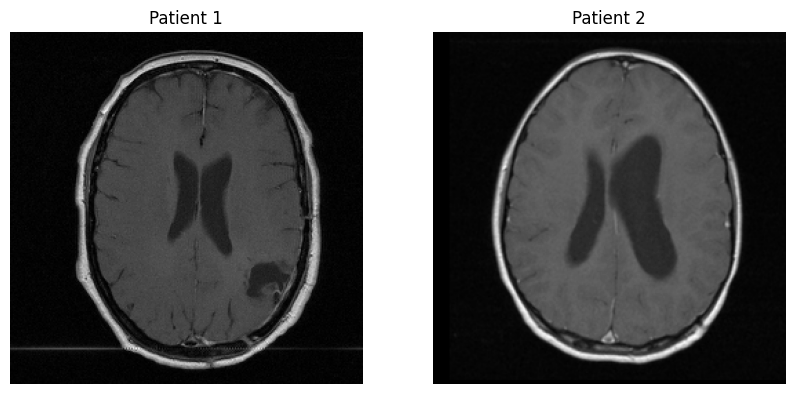

In [3]:
# Load data
MR_patient1_path = os.path.join(BASE_PATH_MR, "patient1.jpg")
MR_patient2_path = os.path.join(BASE_PATH_MR, "patient2.jpg")
im_patient1 = iio.imread(MR_patient1_path)[:, :, 0]
im_patient2 = iio.imread(MR_patient2_path)[:, :, 0]

# Plot MR data
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(im_patient1, cmap="gray")
ax[1].imshow(im_patient2, cmap="gray")

[axes.set_axis_off() for axes in ax.flatten()]
ax[0].set_title("Patient 1")
ax[1].set_title("Patient 2");

In [ ]:
# Make a results directory if non exists
if os.path.exists(os.path.join(BASE_PATH_MR, 'results')) is False:
    os.mkdir(os.path.join(BASE_PATH_MR, 'results'))

# Define the paths to the two images you want to register
fixed_image_path = MR_patient1_path
moving_image_path = MR_patient2_path

# Define a new elastix object 'el' with the correct path to elastix
el = elastix.ElastixInterface(elastix_path=ELASTIX_PATH)

# Execute the registration. Make sure the paths below are correct, and
# that the results folder exists from where you are running this script
el.register(
    fixed_image=fixed_image_path,
    moving_image=moving_image_path,
    parameters=[os.path.join(BASE_PATH_MR, "parameters_bspline_multires_MR.txt")],
    output_dir=os.path.join(BASE_PATH_MR, 'results')
)

# Find the results
transform_path = os.path.join(BASE_PATH_MR, 'results', 'TransformParameters.0.txt')
result_path = os.path.join(BASE_PATH_MR, 'results', 'result.0.tiff')

# Open the logfile into the dictionary log
for i in range(5):
    log_path = os.path.join(BASE_PATH_MR, 'results', 'IterationInfo.0.R{}.txt'.format(i))
    log = elastix.logfile(log_path)
    # Plot the 'metric' against the iteration number 'itnr'
    plt.plot(log['itnr'], log['metric'])
plt.legend(['Resolution {}'.format(i) for i in range(5)])
plt.grid()

# Load the fixed, moving, and result images
fixed_image = iio.imread(fixed_image_path)[:, :, 0]
moving_image = iio.imread(moving_image_path)[:, :, 0]
transformed_moving_image = iio.imread(result_path)

# Show the resulting image side by side with the fixed and moving image
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(fixed_image, cmap='gray')
ax[0].set_title('Fixed image')
ax[1].imshow(moving_image, cmap='gray')
ax[1].set_title('Moving image')
ax[2].imshow(transformed_moving_image, cmap='gray')
ax[2].set_title('Transformed\nmoving image')

# Make a new transformix object tr with the CORRECT PATH to transformix
tr = elastix.TransformixInterface(parameters=transform_path,
                                  transformix_path=TRANSFORMIX_PATH)

# Transform a new image with the transformation parameters
transformed_image_path = tr.transform_image(moving_image_path, output_dir=os.path.join(BASE_PATH_MR, 'results'))

# Get the Jacobian matrix
jacobian_matrix_path = tr.jacobian_matrix(output_dir=os.path.join(BASE_PATH_MR, 'results'))

# Get the Jacobian determinant
jacobian_determinant_path = tr.jacobian_determinant(output_dir=os.path.join(BASE_PATH_MR, 'results'))

# Get the full deformation field
deformation_field_path = tr.deformation_field(output_dir=os.path.join(BASE_PATH_MR, 'results'))

# Add a plot of the Jacobian determinant (in this case, the file is a tiff file)
ax[3].imshow(iio.imread(jacobian_determinant_path.replace('dcm', 'tiff')))
ax[3].set_title('Jacobian\ndeterminant')

# Show the plots
[x.set_axis_off() for x in ax]
plt.show();

NameError: name 'os' is not defined